In [267]:
# Import relevant packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [268]:
# Load data
pd.set_option('display.max_columns', None)
df = pd.read_csv('medical_clean.csv')

In [269]:
# View dataframe
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [270]:
# View dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [271]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [272]:
# Looks like there are no obvious outliers, and no values missing.

In [273]:
# Let's drop columns we aren't going to use (because they don't hold data we can use).
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID'], axis = 1, inplace=True)

In [274]:
# I don't want to include other columns for various reasons. State, City, County, and Zip are categorical, and the latter three have hundreds or thousands of different categories. This will overcomplicate the model and dataset, and are also somewhat redunant since we are using Latitude and Longitude. Furthermore, there is likely to be multicollinearity with these variables since they are all related to location.
print(df['County'].nunique())
print(df['City'].nunique())
print(df['Zip'].nunique())
df.drop(['County', 'City', 'Zip', 'State'], axis = 1, inplace=True)

1607
6072
8612


In [275]:
# Job and timezone are other categorical variables with too many categories and/or likely no useful (to the model) information.
df.drop(['Job', 'TimeZone'], axis = 1, inplace=True)

In [276]:
# I also want to drop the TotalCharge column - it is a function of whether or not a person is readmitted, not the other way around.
df.drop(['TotalCharge'], axis = 1, inplace=True)


In [277]:
# I need to rename the last 8 columns - if I don't the numbers in the column names will cause an error later.
df.rename(columns = {'Item1': 'Timely_admission', 'Item2': 'Timely_treatment', 'Item3': 'Timely_visits', 'Item4': 'Reliability',
                     'Item5': 'Options', 'Item6': 'Hours_of_treatment', 'Item7': 'Courteous_staff', 'Item8': 'Active_listening'}, inplace=True)


# Visualizations: Univariate

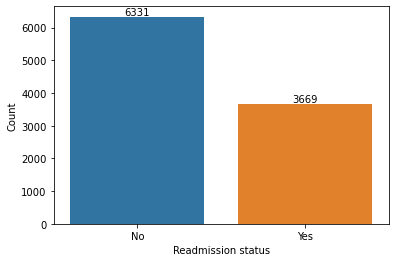

In [278]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='ReAdmis', data=df)
graph.set(xlabel="Readmission status", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

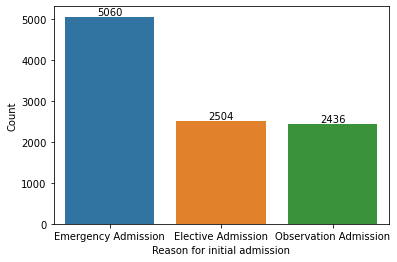

In [279]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Initial_admin', data=df)
graph.set(xlabel="Reason for initial admission", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

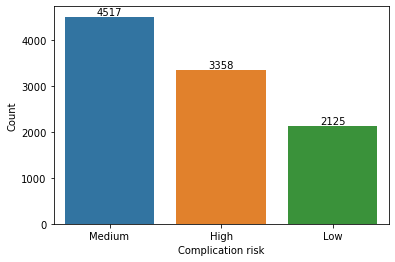

In [280]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Complication_risk', data=df)
graph.set(xlabel="Complication risk", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

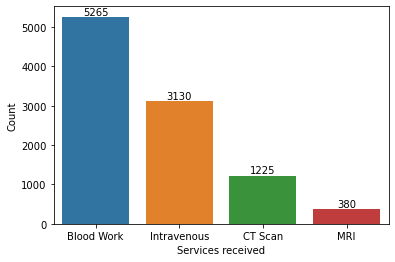

In [281]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Services', data=df)
graph.set(xlabel="Services received", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

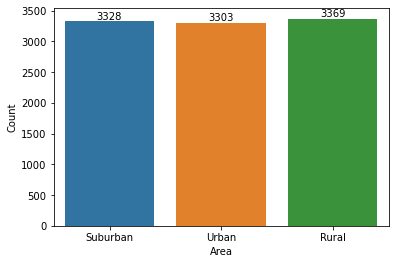

In [282]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Area', data=df)
graph.set(xlabel="Area", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

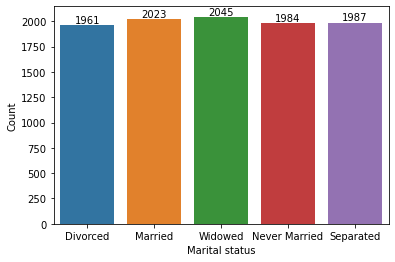

In [283]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Marital', data=df)
graph.set(xlabel="Marital status", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

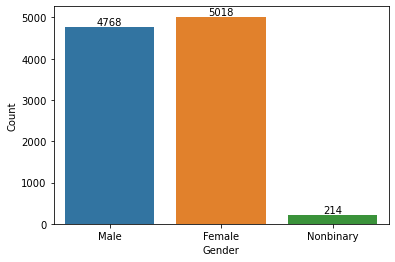

In [284]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Gender', data=df)
graph.set(xlabel="Gender", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

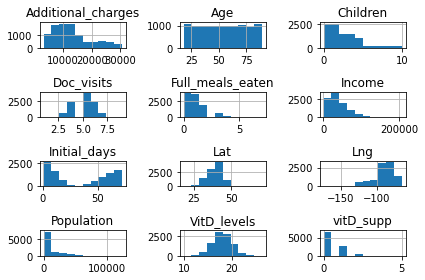

In [285]:
df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 
    'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Additional_charges', 'Initial_days']].hist()
plt.tight_layout();

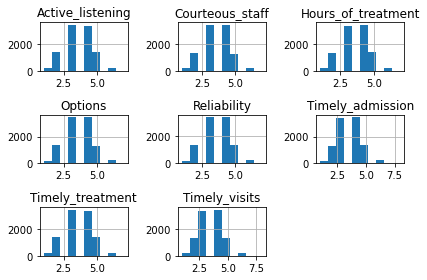

In [286]:
df[['Timely_admission', 'Timely_treatment', 'Timely_visits', 'Reliability', 
    'Options', 'Hours_of_treatment', 'Courteous_staff', 'Active_listening']].hist()
plt.tight_layout();

# Visualizations: Bivariate

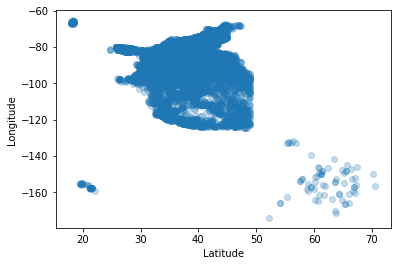

In [287]:
plt.scatter(df['Lat'], df['Lng'], alpha=0.25)
plt.xlabel('Latitude')
plt.ylabel('Longitude');

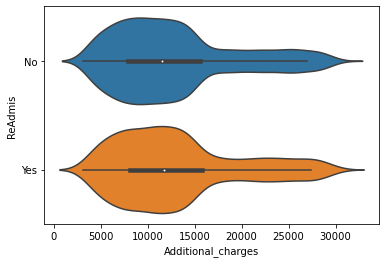

In [288]:
sb.violinplot(data = df, x = 'Additional_charges', y = 'ReAdmis');

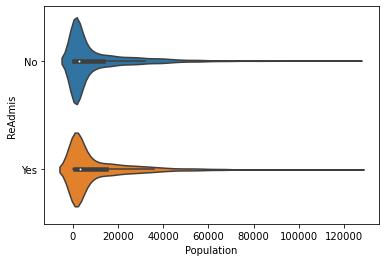

In [289]:
sb.violinplot(data = df, x = 'Population', y = 'ReAdmis');

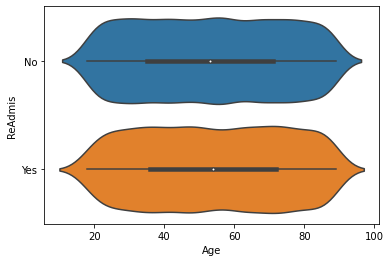

In [290]:
sb.violinplot(data = df, x = 'Age', y = 'ReAdmis');

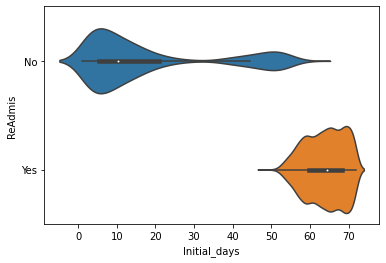

In [291]:
sb.violinplot(data = df, x = 'Initial_days', y = 'ReAdmis');

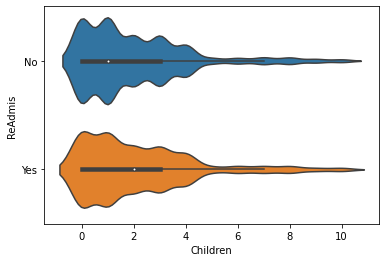

In [292]:
sb.violinplot(data = df, x = 'Children', y = 'ReAdmis');

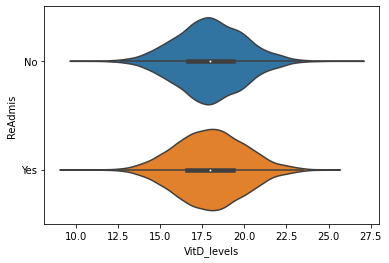

In [293]:
sb.violinplot(data = df, x = 'VitD_levels', y = 'ReAdmis');

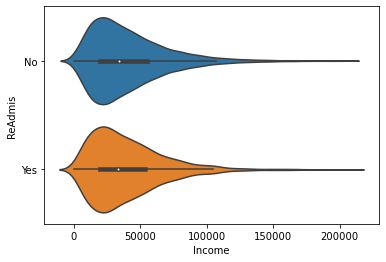

In [294]:
sb.violinplot(data = df, x = 'Income', y = 'ReAdmis');

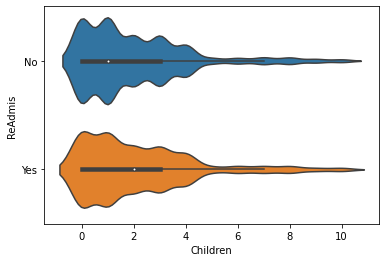

In [295]:
sb.violinplot(data = df, x = 'Children', y = 'ReAdmis');

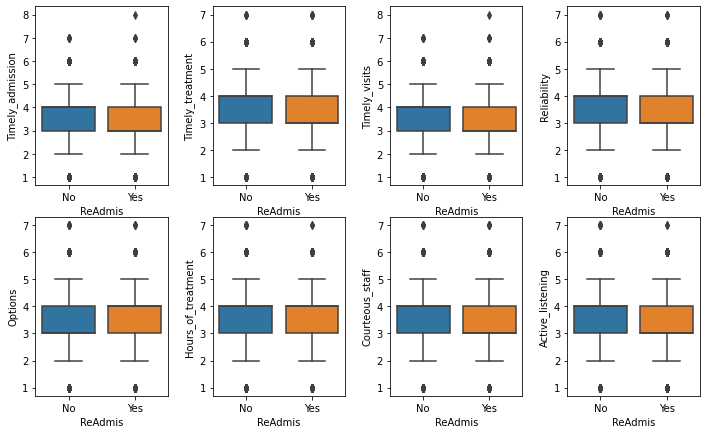

In [296]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,6))
plt.tight_layout()
ax1 = sb.boxplot(y="Timely_admission", x= "ReAdmis", data=df, ax=axes[0, 0])
ax2 = sb.boxplot(y="Timely_treatment", x= "ReAdmis", data=df,  ax=axes[0, 1])
ax3 = sb.boxplot(y="Timely_visits", x= "ReAdmis", data=df,  ax=axes[0, 2])
ax4 = sb.boxplot(y="Reliability", x= "ReAdmis", data=df,  ax=axes[0, 3])
ax5 = sb.boxplot(y="Options", x= "ReAdmis", data=df,  ax=axes[1, 0])
ax6 = sb.boxplot(y="Hours_of_treatment", x= "ReAdmis", data=df,  ax=axes[1,1])
ax7 = sb.boxplot(y="Courteous_staff", x= "ReAdmis", data=df,  ax=axes[1,2])
ax8 = sb.boxplot(y="Active_listening", x= "ReAdmis", data=df,  ax=axes[1,3]);

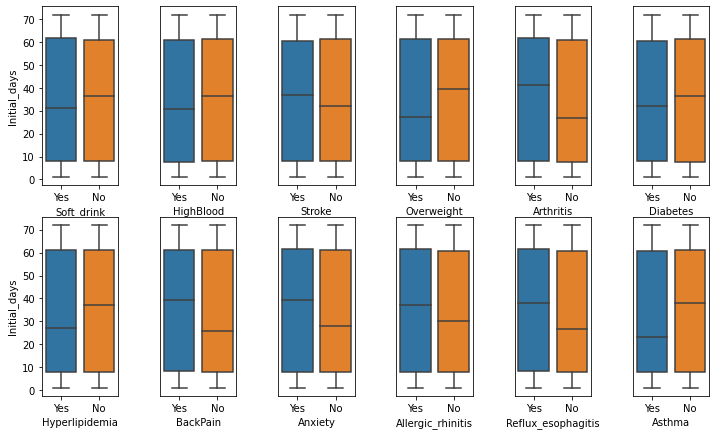

In [297]:
f, axes = plt.subplots(nrows=2, ncols=6, figsize=(10,6))
plt.tight_layout()
ax1 = sb.boxplot(y="Initial_days", x= "Soft_drink", data=df, ax=axes[0, 0], order=("Yes", "No"))
ax2 = sb.boxplot(y="Initial_days", x= "HighBlood", data=df,  ax=axes[0, 1],order=("Yes", "No"))
ax2.axes.get_yaxis().set_visible(False)
ax3 = sb.boxplot(y="Initial_days", x= "Stroke", data=df,  ax=axes[0, 2],order=("Yes", "No"))
ax3.axes.get_yaxis().set_visible(False)
ax4 = sb.boxplot(y="Initial_days", x= "Overweight", data=df,  ax=axes[0, 3],order=("Yes", "No"))
ax4.axes.get_yaxis().set_visible(False)
ax5 = sb.boxplot(y="Initial_days", x= "Arthritis", data=df,  ax=axes[0, 4], order=("Yes", "No"))
ax5.axes.get_yaxis().set_visible(False)
ax6 = sb.boxplot(y="Initial_days", x= "Diabetes", data=df,  ax=axes[0,5],order=("Yes", "No"))
ax6.axes.get_yaxis().set_visible(False)
ax7 = sb.boxplot(y="Initial_days", x= "Hyperlipidemia", data=df,  ax=axes[1,0],order=("Yes", "No"))
ax8 = sb.boxplot(y="Initial_days", x= "BackPain", data=df,  ax=axes[1,1],order=("Yes", "No"))
ax8.axes.get_yaxis().set_visible(False)
ax9 = sb.boxplot(y="Initial_days", x= "Anxiety", data=df,  ax=axes[1,2],order=("Yes", "No"))
ax9.axes.get_yaxis().set_visible(False)
ax10 = sb.boxplot(y="Initial_days", x= "Allergic_rhinitis", data=df,  ax=axes[1,3],order=("Yes", "No"))
ax10.axes.get_yaxis().set_visible(False)
ax11 = sb.boxplot(y="Initial_days", x= "Reflux_esophagitis", data=df,  ax=axes[1,4],order=("Yes", "No"))
ax11.axes.get_yaxis().set_visible(False)
ax12 = sb.boxplot(y="Initial_days", x= "Asthma", data=df,  ax=axes[1,5],order=("Yes", "No"))
ax12.axes.get_yaxis().set_visible(False);

# Part IV

In [298]:
# Create dummies for categorical variables
df_cats = df[['Area','Marital','Gender','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services', 'Complication_risk', 'BackPain', 'ReAdmis']]
df_dummies = pd.get_dummies(data=df_cats, drop_first=True)
df_new = df.join(df_dummies)

In [299]:
# Drop old categorical columns
df_new.drop(['Area','Marital','Gender','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services', 'Complication_risk', 'BackPain', 'ReAdmis'], axis = 1, inplace=True)

In [300]:
# Create initial model with all existing variables
df_new['intercept'] = 1
df_new.columns = df_new.columns.str.replace(' ', '_')
X = df_new[['intercept', 'Initial_days', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Doc_visits', 
'Full_meals_eaten', 'vitD_supp', 'Timely_admission', 'VitD_levels', 'Additional_charges',
'Timely_treatment', 'Timely_visits', 'Reliability', 'Options', 'Hours_of_treatment', 
'Courteous_staff', 'Active_listening', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 
'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 
'Soft_drink_Yes', 'Initial_admin_Emergency_Admission', 'Initial_admin_Observation_Admission', 
'HighBlood_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 
'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT_Scan', 
'Services_Intravenous', 'Services_MRI', 'Complication_risk_Low', 'Complication_risk_Medium', 'BackPain_Yes']]

y = df_new['ReAdmis_Yes']

In [301]:
logit_mod = sm.Logit(y, X)
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
=======================================================================================
Model:                        Logit                    Pseudo R-squared:         inf   
Dependent Variable:           ReAdmis_Yes              AIC:                      inf   
Date:                         2021-09-22 19:55         BIC:                      inf   
No. Observations:             10000                    Log-Likelihood:           -inf  
Df Model:                     47                       LL-Null:                  0.0000
Df Residuals:                 9952                     LLR p-value:              1.0000
Converged:                    1.0000                   Scale:                    1.0000
No. Iterations:               14.0000                                                  
---------------------------------------------------------------------------------------
                                     Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------------
intercept                           -85.5937   5.1785 -16.5287 0.0000 -95.7433 -75.4441
Initial_days                          1.5392   0.0891  17.2792 0.0000   1.3646   1.7138
Lat                                   0.0405   0.0199   2.0386 0.0415   0.0016   0.0794
Lng                                   0.0089   0.0069   1.2848 0.1989  -0.0047   0.0225
Population                            0.0000   0.0000   0.9183 0.3584  -0.0000   0.0000
Children                              0.0917   0.0476   1.9292 0.0537  -0.0015   0.1850
Age                                  -0.0044   0.0153  -0.2875 0.7737  -0.0344   0.0256
Income                                0.0000   0.0000   0.4294 0.6676  -0.0000   0.0000
Doc_visits                            0.0126   0.1016   0.1239 0.9014  -0.1866   0.2118
Full_meals_eaten                      0.0339   0.1067   0.3178 0.7506  -0.1753   0.2431
vitD_supp                            -0.0985   0.1695  -0.5813 0.5610  -0.4306   0.2336
Timely_admission                     -0.0155   0.1568  -0.0987 0.9214  -0.3229   0.2919
VitD_levels                           0.0313   0.0503   0.6218 0.5341  -0.0674   0.1300
Additional_charges                    0.0000   0.0001   0.4867 0.6265  -0.0001   0.0002
Timely_treatment                      0.2697   0.1407   1.9170 0.0552  -0.0060   0.5455
Timely_visits                        -0.1553   0.1308  -1.1873 0.2351  -0.4116   0.1011
Reliability                           0.0529   0.1159   0.4564 0.6481  -0.1743   0.2801
Options                              -0.1545   0.1205  -1.2819 0.1999  -0.3908   0.0817
Hours_of_treatment                   -0.0687   0.1283  -0.5354 0.5923  -0.3200   0.1827
Courteous_staff                       0.1279   0.1166   1.0967 0.2728  -0.1007   0.3566
Active_listening                     -0.2143   0.1099  -1.9494 0.0513  -0.4298   0.0012
Area_Suburban                         0.0525   0.2580   0.2034 0.8389  -0.4532   0.5581
Area_Urban                            0.0818   0.2658   0.3077 0.7583  -0.4392   0.6028
Marital_Married                       0.1327   0.3425   0.3875 0.6984  -0.5386   0.8041
Marital_Never_Married                 0.2749   0.3500   0.7854 0.4322  -0.4111   0.9610
Marital_Separated                    -0.0991   0.3526  -0.2810 0.7787  -0.7901   0.5919
Marital_Widowed                       0.0952   0.3449   0.2759 0.7826  -0.5809   0.7712
Gender_Male                           0.1766   0.2142   0.8244 0.4097  -0.2432   0.5964
Gender_Nonbinary                      0.2004   0.7361   0.2722 0.7855  -1.2425   1.6432
Soft_drink_Yes                        0.2667   0.2486   1.0731 0.2832  -0.2205   0.7539
Initial_admin_Emergency_Admission     2.6205   0.2987   8.7721 0.0000   2.0350   3.2061
Initial_admin_Observation_Admission   0.8808   0.2927   3.0093 0.0026   0.3072   1.4545
HighBlood_Yes               

In [302]:
# And let's check the variance inflation factors (VIF's) - we'll remove any variables with VIF's greater than 10.
y, X = dmatrices('ReAdmis_Yes ~ Initial_days + Lat + Lng + Population + Children + Age + Income + VitD_levels + Doc_visits + Full_meals_eaten + vitD_supp + Additional_charges + Timely_admission + Timely_treatment + Timely_visits + Reliability + Options + Hours_of_treatment + Courteous_staff + Active_listening + Area_Suburban + Area_Urban + Marital_Married + Marital_Never_Married + Marital_Separated + Marital_Widowed + Gender_Male + Gender_Nonbinary + Soft_drink_Yes + Initial_admin_Emergency_Admission + Initial_admin_Observation_Admission + HighBlood_Yes + Stroke_Yes + Overweight_Yes + Arthritis_Yes + Diabetes_Yes + Hyperlipidemia_Yes + Anxiety_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes + Asthma_Yes + Services_CT_Scan + Services_Intravenous + Services_MRI + Complication_risk_Low + Complication_risk_Medium + BackPain_Yes', df_new, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["variables"] = X.columns

In [303]:
vif

,VIF Factor,variables
0,299.138999,Intercept
1,1.005933,Initial_days
2,1.065386,Lat
3,1.019735,Lng
4,1.053893,Population
5,1.005036,Children
6,9.287632,Age
7,1.004456,Income
8,1.006898,VitD_levels
9,1.004638,Doc_visits


In [304]:
# Two variables have VIF's above 10: Intercept (which we will leave in) and Additional_charges, which will get removed anyway because of it's high p-value.

In [305]:
# Drop variables with p-values below 0.05.
X.drop(['Additional_charges', 'Children', 'Lng', 'Population', 'Age', 'Income', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'VitD_levels', 
         'Timely_treatment', 'Timely_visits', 'Reliability', 'Options', 'Hours_of_treatment', 'Marital_Widowed',
        'Courteous_staff', 'Active_listening', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 'Gender_Male',
            'Gender_Nonbinary', 'Soft_drink_Yes', 'Timely_admission', 'Marital_Never_Married', 'Marital_Separated',
            'HighBlood_Yes', 'Overweight_Yes', 'Hyperlipidemia_Yes',
            'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Services_Intravenous',
            'Complication_risk_Medium', 'BackPain_Yes'], axis = 1, inplace=True)



In [306]:
# Reduced model
logit_mod = sm.Logit(y, X)
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.034906
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
=======================================================================================
Model:                      Logit                    Pseudo R-squared:         0.947   
Dependent Variable:         ReAdmis_Yes              AIC:                      724.1220
Date:                       2021-09-22 19:55         BIC:                      817.8564
No. Observations:           10000                    Log-Likelihood:           -349.06 
Df Model:                   12                       LL-Null:                  -6572.9 
Df Residuals:               9987                     LLR p-value:              0.0000  
Converged:                  1.0000                   Scale:                    1.0000  
No. Iterations:             14.0000                                                    
---------------------------------------------------------------------------------------
                                     Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------------
Intercept                           -77.8966   4.2903 -18.1565 0.0000 -86.3054 -69.4878
Initial_days                          1.4094   0.0763  18.4837 0.0000   1.2600   1.5589
Lat                                   0.0199   0.0173   1.1563 0.2475  -0.0139   0.0538
Initial_admin_Emergency_Admission     2.3833   0.2662   8.9516 0.0000   1.8615   2.9051
Initial_admin_Observation_Admission   0.7236   0.2688   2.6917 0.0071   0.1967   1.2505
Stroke_Yes                            1.5632   0.2606   5.9984 0.0000   1.0524   2.0740
Arthritis_Yes                        -1.2450   0.2162  -5.7594 0.0000  -1.6687  -0.8213
Diabetes_Yes                          0.3277   0.2192   1.4948 0.1350  -0.1020   0.7573
Anxiety_Yes                          -0.9108   0.2135  -4.2653 0.0000  -1.3293  -0.4923
Asthma_Yes                           -1.2800   0.2253  -5.6813 0.0000  -1.7216  -0.8384
Services_CT_Scan                      1.5156   0.3401   4.4558 0.0000   0.8489   2.1822
Services_MRI                          2.6260   0.4750   5.5281 0.0000   1.6949   3.5570
Complication_risk_Low                -1.6417   0.2509  -6.5445 0.0000  -2.1334  -1.1500
=======================================================================================

"""

In [307]:
# Our reduced model looks a lot different.
# Also, two of our p-values are now above 0.05. We should remove those.

In [308]:
# Let's further reduce the model.
X.drop(['Lat', 'Diabetes_Yes'],axis = 1, inplace=True)

In [309]:
# Further reduced model
logit_mod = sm.Logit(y, X)
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.035084
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
=======================================================================================
Model:                      Logit                    Pseudo R-squared:         0.947   
Dependent Variable:         ReAdmis_Yes              AIC:                      723.6874
Date:                       2021-09-22 19:55         BIC:                      803.0012
No. Observations:           10000                    Log-Likelihood:           -350.84 
Df Model:                   10                       LL-Null:                  -6572.9 
Df Residuals:               9989                     LLR p-value:              0.0000  
Converged:                  1.0000                   Scale:                    1.0000  
No. Iterations:             14.0000                                                    
---------------------------------------------------------------------------------------
                                     Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------------
Intercept                           -76.5357   4.1251 -18.5536 0.0000 -84.6207 -68.4506
Initial_days                          1.4005   0.0754  18.5696 0.0000   1.2527   1.5483
Initial_admin_Emergency_Admission     2.3585   0.2640   8.9342 0.0000   1.8411   2.8759
Initial_admin_Observation_Admission   0.6995   0.2678   2.6117 0.0090   0.1745   1.2244
Stroke_Yes                            1.5214   0.2573   5.9129 0.0000   1.0171   2.0257
Arthritis_Yes                        -1.2106   0.2137  -5.6652 0.0000  -1.6294  -0.7918
Anxiety_Yes                          -0.9343   0.2132  -4.3822 0.0000  -1.3521  -0.5164
Asthma_Yes                           -1.2598   0.2239  -5.6274 0.0000  -1.6985  -0.8210
Services_CT_Scan                      1.5609   0.3381   4.6166 0.0000   0.8982   2.2236
Services_MRI                          2.6098   0.4778   5.4624 0.0000   1.6734   3.5462
Complication_risk_Low                -1.6137   0.2487  -6.4877 0.0000  -2.1012  -1.1262
=======================================================================================

"""

In [310]:
# Check VIF again
y, X = dmatrices('ReAdmis_Yes ~ Initial_days + Initial_admin_Emergency_Admission + Initial_admin_Observation_Admission + Stroke_Yes + Arthritis_Yes + Anxiety_Yes + Asthma_Yes + Services_CT_Scan + Services_MRI + Complication_risk_Low', df_new, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["variables"] = X.columns
vif

,VIF Factor,variables
0,7.842838,Intercept
1,1.001341,Initial_days
2,1.492909,Initial_admin_Emergency_Admission
3,1.492923,Initial_admin_Observation_Admission
4,1.000820,Stroke_Yes
5,1.000896,Arthritis_Yes
6,1.000787,Anxiety_Yes
7,1.000626,Asthma_Yes
8,1.006700,Services_CT_Scan
9,1.005860,Services_MRI


In [311]:
# Get exponential of coefficients
np.exp(results.params)

Intercept                              5.767475e-34
Initial_days                           4.057139e+00
Initial_admin_Emergency_Admission      1.057547e+01
Initial_admin_Observation_Admission    2.012718e+00
Stroke_Yes                             4.578620e+00
Arthritis_Yes                          2.980263e-01
Anxiety_Yes                            3.928752e-01
Asthma_Yes                             2.837234e-01
Services_CT_Scan                       4.763169e+00
Services_MRI                           1.359645e+01
Complication_risk_Low                  1.991446e-01
dtype: float64

In [312]:
# Split and train model: source: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [313]:
# Create confusion matrix
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)
preds = log_mod.predict(X_test)
cf_matrix = confusion_matrix(y_test, preds)
print(conf_matrix)

[[1249   13]
 [  12  726]]


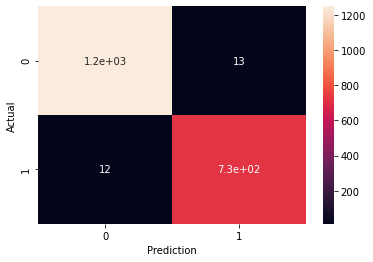

In [314]:
# Confusion matrix in a heat map
graph = sb.heatmap(conf_matrix, annot=True)
graph.set(xlabel="Prediction", ylabel = "Actual");

In [315]:
# Precision score (true positives / true positives + false positives)
precision_score(y_test, predictions)

0.9824086603518268

In [316]:
# Recall score (true positives / true positives + false negatives)
recall_score(y_test, predictions)

0.983739837398374

In [317]:
# Accuracy score (correct/all)
accuracy_score(y_test, predictions)

0.9875

In [318]:
# Logit marginal effects
# Source: https://onezero.blog/fitting-mlr-and-binary-logistic-regression-using-python/
AME = model.get_margeff(at='overall', method='dydx')
AME.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:            ReAdmis_Yes
Method:                          dydx
At:                           overall
=======================================================================================================
                                         dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Initial_days                            0.0149   8.39e-05    178.076      0.000       0.015       0.015
Initial_admin_Emergency_Admission       0.0252      0.002     10.199      0.000       0.020       0.030
Initial_admin_Observation_Admission     0.0075      0.003      2.637      0.008       0.002       0.013
Stroke_Yes                              0.0162      0.003      6.228      0.000       0.011       0.021
Arthritis_Yes                          -0.0129      0.002     -5.936      0.000      -0.017      -0.009
Anxiety_Yes                            -0.0100      0.002     -4.504      0.000      -0.014      -0.006
Asthma_Yes                             -0.0134      0.002     -5.903      0.000      -0.018      -0.009
Services_CT_Scan                        0.0167      0.003      4.786      0.000       0.010       0.023
Services_MRI                            0.0278      0.005      5.716      0.000       0.018       0.037
Complication_risk_Low                  -0.0172      0.002     -6.890      0.000      -0.022      -0.012
=======================================================================================================
"""